In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
import pathlib

In [2]:
!pip install tensorflow

In [3]:
train_dir = pathlib.Path("C:/Users/DEEPANRAJ A/Downloads/archive (1)/data/training")
test_dir = pathlib.Path("C:/Users/DEEPANRAJ A/Downloads/archive (1)/data/validation")

In [4]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [5]:
train_data = generator.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = generator.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [6]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"


In [7]:
!pip install tensorflow_hub

In [9]:
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [10]:
from tensorflow.keras import layers

In [11]:
resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(2, activation='softmax', name='output_layer') # create our own output layer
  ])

In [12]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [13]:
resnet_model_history = resnet_model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/5
58/58 [==============================] - 104s 2s/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.2598 - val_accuracy: 0.8978
Epoch 2/5
58/58 [==============================] - 86s 1s/step - loss: 0.2620 - accuracy: 0.8918 - val_loss: 0.2897 - val_accuracy: 0.8804
Epoch 3/5
58/58 [==============================] - 88s 2s/step - loss: 0.2408 - accuracy: 0.9027 - val_loss: 0.3304 - val_accuracy: 0.8543
Epoch 4/5
58/58 [==============================] - 88s 2s/step - loss: 0.2159 - accuracy: 0.9065 - val_loss: 0.3793 - val_accuracy: 0.8674
Epoch 5/5
58/58 [==============================] - 86s 1s/step - loss: 0.2033 - accuracy: 0.9120 - val_loss: 0.5408 - val_accuracy: 0.7783


In [16]:
resnet_model.evaluate(test_data)

15/15 [==============================] - 18s 1s/step - loss: 0.5536 - accuracy: 0.7543


[0.5535764098167419, 0.7543478012084961]

<AxesSubplot:>

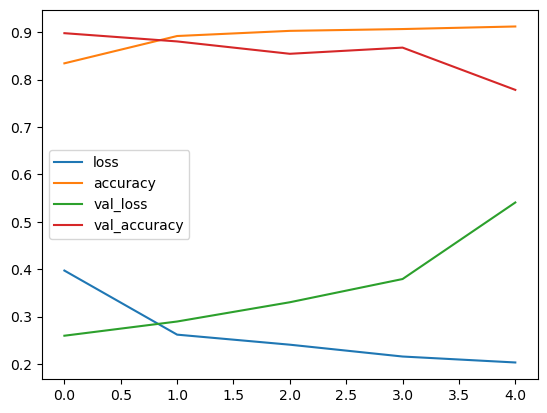

In [17]:
pd.DataFrame(resnet_model_history.history).plot()

In [18]:
img0="damage.jpg"
img1='notd.jpg'

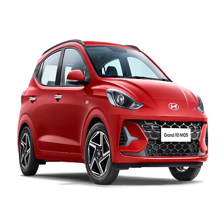

In [27]:
import PIL.Image as Image
pred_image=Image.open(img1).resize((224,224))
pred_image

In [28]:
pred_image=np.array(pred_image)/255.0


In [29]:
result1 = resnet_model.predict(pred_image[np.newaxis,...])
max=np.argmax(result1)

1/1 [==============================] - 0s 57ms/step


In [30]:
max

1

In [31]:
res=["Damaged_car","Notdamaged_car"]

In [32]:
res[max]

'Notdamaged_car'

In [33]:
resnet_model.save("C:/Users/DEEPANRAJ A/Downloads/deepan0/model.h5")

In [34]:
resnet_model.save("downloads/newmodel.h5")